# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\mlfba\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


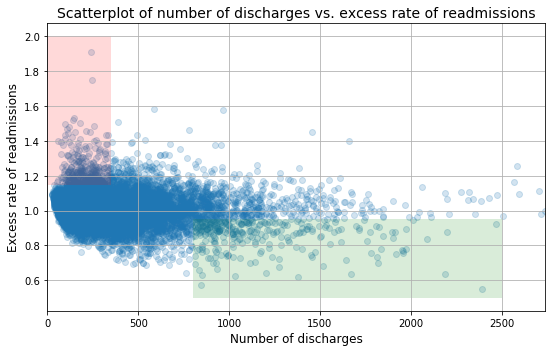

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not? ##
The observations based on the plot are subjective and were not formally tested. Only visual inspection of the plot was performed.

The statistics are not entirely correct. When the conditions were simulated, the excess readmission ratio greater than 1 is actually *59%* and not 63% as it claimed.

The first conclusion claimed "significant" correlation without evidence – again this is likely based on just observing the plot. The second conclusion is a mere inference as opposed to a conclusion: correlation was not established and the difference in distribution between the specified hospital categorization was not tested.

The recommendation defined a hospital with a "small" capacity in a different context than in the report's Statistics section, *i.e. less than 300 vs. less than 100*. So even though the policy recommendations seem practical, they are not justified by the data presented.

In [5]:
df = clean_hospital_read_df

#statistics on hospitals/facilities with number of discharges < 100
small_hosp_mean = df[df["Number of Discharges"] < 100]["Excess Readmission Ratio"].mean()
small_hosp_ratio = len(df[(df["Number of Discharges"] < 100) & (df["Excess Readmission Ratio"] > 1)]) \
                   / len(df[df["Number of Discharges"] < 100])
small_hosp_ratio *=100

#statistics on hospitals/facilities with number of discharges > 1000
large_hosp_mean = df[df["Number of Discharges"] > 1000]["Excess Readmission Ratio"].mean()
large_hosp_ratio = len(df[(df["Number of Discharges"] > 1000) & (df["Excess Readmission Ratio"] > 1)]) \
                   / len(df[df["Number of Discharges"] > 1000])
large_hosp_ratio *= 100

#displaying the stats
print("'Small' hospital mean: %.2f" % small_hosp_mean)
print("'Small' hospital with ratio > 1: %.2f%%" \
      % small_hosp_ratio)
print("'Large' hospital mean: %.2f" % large_hosp_mean)
print("'Large' hospital with ratio > 1: %.2f%%" \
      % large_hosp_ratio)

'Small' hospital mean: 1.02
'Small' hospital with ratio > 1: 59.18%
'Large' hospital mean: 0.98
'Large' hospital with ratio > 1: 44.49%


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis: ##
The goal is to investigate if there is a correlation between the excessive readmission ratio and the number of discharges. From there, we'll be able to establish grounds for policy recommendation. To quantify correlation, we'll be using the Pearson coefficient as our test statistic.

### 1. Setup an appropriate hypothesis test. ###
* Null Hypothesis: $Pearson_{Excess\space Readmission\space Ratio \space \& \space Number\space of\space Discharges} = 0$
* Alternative Hypothesis: $Pearson_{Excess\space Readmission\space Ratio \space \& \space Number\space of\space Discharges} \neq 0$

### 2. Compute and report the observed significance value (or p-value). ###
Assuming that the null hypothesis is true, the coefficients between the `Excess Readmission Ratio` and the `Number of Discharges` would be `0`, meaning that there is *no* correlation between the two variables. Our actual `observed` test statistic is `-0.10` as computed below, which suggests there *is* indeed a (negative) correlation between them, though very weak. Since what we observe is different from what we expect given the null hypothesis, we will identify if this is due to random chance, or if there is truly a likelihood that perhaps the Pearson really isn't `0`.

In [6]:
import seaborn as sns

from scipy.stats import pearsonr

#dropping NaNs and simplifying dataframe
df = clean_hospital_read_df.dropna(subset=["Excess Readmission Ratio"])
df = df[["Excess Readmission Ratio", "Number of Discharges"]]

#getting correlation constant
pearson = pearsonr(df["Excess Readmission Ratio"], df["Number of Discharges"])
print("The pearson correlation coefficient: %.2f" % pearson[0])

The pearson correlation coefficient: -0.10


In order to understand the data, it helps to generate visualizations. For the data in its original state, we see that there are clear outliers. We update the dataframe to get rid of the hospitals that discharge more than `3000` patients.

The linear regression lines are imposed on both charts and we can see how the slope waned upon modifying the data. Still, we can see that the Pearson coefficient did not improve.

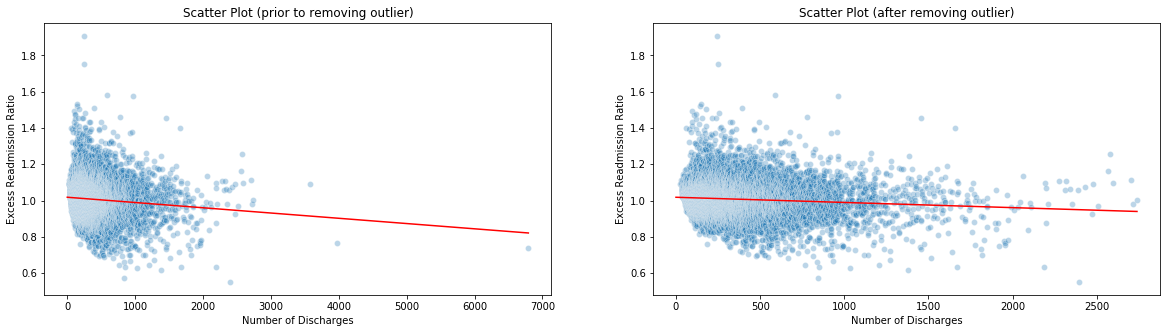

The pearson correlation coefficient: -0.09


In [7]:
f, axes = plt.subplots(1, 2, figsize=(20,5))

#scatterplot of original data
ax = sns.scatterplot(df["Number of Discharges"], df["Excess Readmission Ratio"], alpha=0.3, ax=axes[0])
ax.set(title="Scatter Plot (prior to removing outlier)")

#getting the line of best fit for the original data
m, b = np.polyfit(df["Number of Discharges"], df["Excess Readmission Ratio"], 1)
reg_x = np.arange(0, max(df["Number of Discharges"]))
reg_y = m * reg_x + b
ax = sns.lineplot(reg_x, reg_y, color="red", ax=axes[0])

#removing the outliers
df["Number of Discharges"] = df[df["Number of Discharges"] < 3000]["Number of Discharges"]
df = df.dropna()

#scatterplot of the modified data
ax = sns.scatterplot(df["Number of Discharges"], df["Excess Readmission Ratio"], alpha=0.3, ax=axes[1])
ax.set(title="Scatter Plot (after removing outlier)")

#getting the line of best fit for the modified data
m, b = np.polyfit(df["Number of Discharges"], df["Excess Readmission Ratio"], 1)
reg_x = np.arange(0, max(df["Number of Discharges"]))
reg_y = m * reg_x + b
ax = sns.lineplot(reg_x, reg_y, color="red", ax=axes[1])
plt.show()

#getting correlation constant of our modified data
pearson = pearsonr(df["Excess Readmission Ratio"], df["Number of Discharges"])
print("The pearson correlation coefficient: %.2f" % pearson[0])

### 3. Report statistical significance for 𝛼  = .01. ###

In [8]:
alpha = 0.01

print("Our critical value has been set to %.2f." % alpha)

Our critical value has been set to 0.01.


### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? ###
In order to test our hypothesis, we simulate situations where the null hypothesis is true. We do a total of 10,000 simulations and see what the probability of getting a Pearson coefficient of `-0.09` or less. This is our p-value `p`, which turned out to be much closer to zero than it is our `alpha`. We therefore *reject* the null hypothesis and conclude from the findings that indeed, it's not true that there is **no** correlation between `Excess Readmission Ratio` and `Number of Discharges`.

C:\Users\mlfba\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


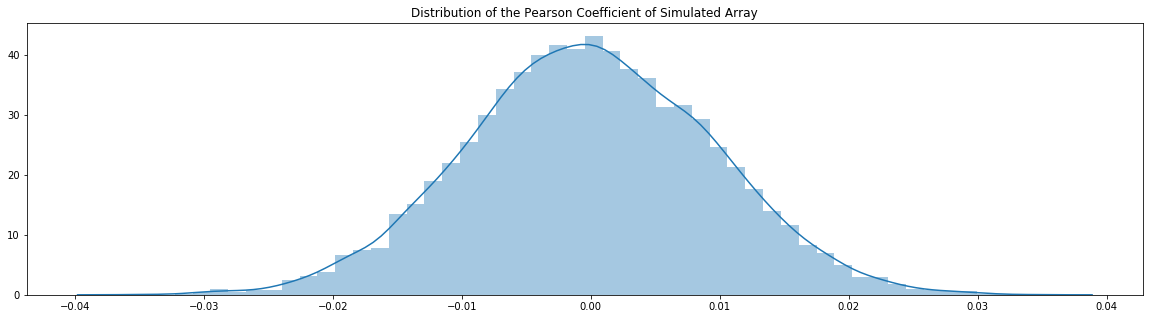

P-value: 0.00010
P-Value less than alpha. REJECT the null hypothesis.


In [9]:
ratio = df["Excess Readmission Ratio"]
discharge = df["Number of Discharges"]

#generating 10,000 permutation replicates
simulation = []
for i in range(10000):
    shuffled_ratio = np.random.permutation(ratio)
    r = pearsonr(ratio, shuffled_ratio)[0]
    simulation.append(r)
simulation = np.array(simulation)

#plotting the distribution of the simulation
f, axes = plt.subplots(figsize=(20,5))
sns.distplot(simulation)
plt.title("Distribution of the Pearson Coefficient of Simulated Array")
plt.show()

#getting the p-value
p = np.sum(r <= pearson)/10000
print("P-value: %.5f" % p)
if p < alpha:
    print("P-Value less than alpha. REJECT the null hypothesis.")
else:
    print("P-Value greater than alpha. Do NOT reject the null hypothesis.")

Though our statistical exploration insists that there *is* correlation, in a practical perspective, we can't disregard the fact that the correlation is very weak. Even just by looking at the linear regression function on the plot, we see that there isn't much slope. So despite rejecting the null hypothesis, we simply just cannot say that there is correlation between the excessive readmission ratio and the number of discharges.

That's our conclusion. From there, we cannot confidently advice a policy change from the data we've been given. That to me is a valid finding. In fact I would be inclined on recommending a proposal to further the study and gather *other* relevant data that may determine some causal relationship with the excessive readmission ratio.

### 5. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner. ###
The scatter plot is a helpful tool but it cannot be used alone. There are different approaches to portraying relationships about the data, and data visualization is just one of them. As we see, the Pearson coefficient is a tried and tested metric that quantifies correlation. We can also append other elements to the scatter plot by superimposing the linear regression line, as we've done. This provided us with a clearer understanding of the meaning behind the data.